<h2 align = 'center'><font color = 'blue'>Data Transformations</font></h2>

`We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.`

`Here is the list of all the transformations which come pre-built with PyTorch`

        1.Compose : transforms.Compose just clubs all the transforms provided to it. So, all the transforms in the transforms.Compose are applied to the input one by one.
        
        2.ToTensor : This just converts your input image to PyTorch tensor.
        
        3.ToPILImage :
        
        4.Normalize
        
        5.Resize
        
        6.Scale
        
        7.CenterCrop
        
        8.Pad
        
        9.Lambda
        
        10.RandomApply
        
        11.RandomChoice
        
        12.RandomOrder
        
        13.RandomCrop
        
        14.RandomHorizontalFlip
        
        15.RandomVerticalFlip
        
        16.RandomResizedCrop
        
        17.RandomSizedCrop
        
        18.FiveCrop
        
        19.TenCrop
        
        20.LinearTransformation
        
        21.ColorJitter
        
        22.RandomRotation
        
        23.RandomAffine
        
        24.Grayscale
        
        25.RandomGrayscale
        
        26.RandomPerspective
        
        27.RandomErasing
 

<h3>torchvision

- `PyTorch provides a package called torchvision to load and prepare dataset.`

In [11]:
from __future__ import print_function
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

http://programmersought.com/article/54041269127/

https://www.aiworkbox.com/lessons/use-torchvision-centercrop-transform-to-do-a-rectangular-crop-of-a-pil-image

***Transforms :***

    We compose a sequence of transformation to pre-process the image:

<h4> 1. compose</h4>

    Transforms are common image transforms. They can be chained together using Compose

`class` ***torchvision.transforms.Compose(transforms)***
    
    Composes several transforms together.

    Parameters:	transforms (list of Transform objects) – list of transforms to compose.
        

In [4]:
##Example

transforms.Compose([
 transforms.CenterCrop(10),
    transforms.ToTensor(),
                   ])

Compose(
    CenterCrop(size=(10, 10))
    ToTensor()
)

https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/

In [3]:
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

`Compose creates a series of transformation to prepare the dataset. Torchvision reads datasets into PILImage (Python imaging format). ToTensor converts the PIL Image from range [0, 255] to a FloatTensor of shape (C x H x W) with range [0.0, 1.0]. We then renormalize the input to [-1, 1] based on the following formula with μ=standard deviation=0.5.`

                    input = input − μ / standard deviation

                    input = input − 0.5 / 0.5

In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
# The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                        #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


<h1>Transforms on PIL Image

`class` ***torchvision.transforms.Resize(size, interpolation=2)***

    Resize the input PIL Image to the given size.

***Parameters:***

    size (sequence or int) – 
                                Desired output size. If size is a sequence like (h, w), output size will be matched to this. If size is an int, smaller edge of the image will be matched to this number. i.e, if height > width, then image will be rescaled to (size * height / width, size)

    interpolation (int, optional) – Desired interpolation. Default is PIL.Image.BILINEAR

In [6]:
a = torch.randint(0,255,(500,500), dtype=torch.uint8)
a
print(a.size())
print(torch.max(a))

a = torch.unsqueeze(a, dim =0)
print(a.size())
compose = transforms.Compose([transforms.ToPILImage(),transforms.Resize((128,128))])

a_trans = compose(a)
print(a_trans.size)
print(a_trans.getextrema())

torch.Size([500, 500])
tensor(254, dtype=torch.uint8)
torch.Size([1, 500, 500])
(128, 128)
(83, 172)


- `The original range is [0,255], after the transforms.resize(), the value range change to [83,172]`

- `I want to do the resize without the change of value range`

- `The problem is solved, the default algorithm for torch.transforms.resize() is BILINEAR SO just set transforms.Resize((128,128),interpolation=Image.NEAREST) Then the value range won’t change!`

In [12]:
a = torch.randint(0,255,(500,500), dtype=torch.uint8)
a
print(a.size())
print(torch.max(a))

a = torch.unsqueeze(a, dim =0)
print(a.size())
compose = transforms.Compose([transforms.ToPILImage(),transforms.Resize((128,128),interpolation = Image.NEAREST)])

a_trans = compose(a)
print(a_trans.size)
print(a_trans.getextrema())

torch.Size([500, 500])
tensor(254, dtype=torch.uint8)
torch.Size([1, 500, 500])
(128, 128)
(0, 254)


In [13]:
a = torch.randint(0,255,(500,500), dtype=torch.uint8)
a
print(a.size())
print(torch.max(a))

a = torch.unsqueeze(a, dim =0)
print(a.size())
compose = transforms.Compose([transforms.ToPILImage(),transforms.Resize((128,128),interpolation = Image.BICUBIC)])

a_trans = compose(a)
print(a_trans.size)
print(a_trans.getextrema())

torch.Size([500, 500])
tensor(254, dtype=torch.uint8)
torch.Size([1, 500, 500])
(128, 128)
(66, 186)


`class` ***torchvision.transforms.Scale(*args, **kwargs)***

    Note: This transform is deprecated in favor of Resize.

https://www.aiworkbox.com/lessons/use-torchvision-centercrop-transform-to-do-a-rectangular-crop-of-a-pil-image

`class` ***torchvision.transforms.CenterCrop(size)***

    Crops the given PIL Image at the center.

***Parameters:***
    
    size (sequence or int) – Desired output size of the crop. If size is an int instead of sequence like (h, w), a square crop (size, size) is made.

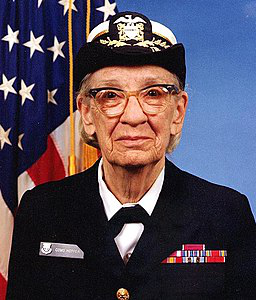

In [16]:
grace_hopper_image = Image.open("256px-Grace_Hopper.jpg")
grace_hopper_image

In [90]:
grace_hopper_image.show()

In [20]:
pt_centercrop_transform_rectangle = transforms.CenterCrop((300,50))
pt_centercrop_transform_rectangle

CenterCrop(size=(300, 50))

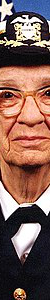

In [22]:
centercrop_rectangle = pt_centercrop_transform_rectangle(grace_hopper_image)
centercrop_rectangle

In [23]:
centercrop_rectangle.show()

`class` ***torchvision.transforms.RandomCrop(size, padding=0)***

    Crop the given PIL Image at a random location.
    
***Parameters:***

    size (sequence or int) – Desired output size of the crop. If size is an int instead of sequence like (h, w), a square crop (size, size) is made.

    padding (int or sequence, optional) – Optional padding on each border of the image. Default is 0, i.e no padding. If a sequence of length 4 is provided, it is used to pad left, top, right, bottom borders respectively.

In [25]:
pt_RandomCrop_transform_rectangle = transforms.RandomCrop((120,80),padding = 4)
pt_RandomCrop_transform_rectangle

RandomCrop(size=(120, 80), padding=4)

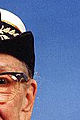

In [28]:
randomcrop_rectangle = pt_RandomCrop_transform_rectangle(grace_hopper_image)
randomcrop_rectangle

In [29]:
randomcrop_rectangle.show()

`class` ***torchvision.transforms.RandomHorizontalFlip***

    Horizontally flip the given PIL Image randomly with a probability of 0.5.

In [39]:
random_H_flip = transforms.RandomHorizontalFlip()
flip = random_H_flip(grace_hopper_image)

In [41]:
flip.show()

`class`***torchvision.transforms.RandomVerticalFlip***

    Vertically flip the given PIL Image randomly with a probability of 0.5.

In [45]:
random_V_flip = transforms.RandomVerticalFlip()
flip = random_V_flip(grace_hopper_image)

In [46]:
flip.show()

`class` ***torchvision.transforms.RandomResizedCrop(size, interpolation=2)***

    Crop the given PIL Image to random size and aspect ratio.

    A crop of random size of (0.08 to 1.0) of the original size and a random aspect ratio of 3/4 to 4/3 of the original aspect ratio is made. This crop is finally resized to given size. This is popularly used to train the Inception networks.

***Parameters:***	
    
    size – expected output size of each edge
    
    interpolation – Default: PIL.Image.BILINEAR

In [49]:
pt_RandomresizedCrop_transform_rectangle = transforms.RandomResizedCrop((80,80),interpolation=2)
pt_RandomresizedCrop_transform_rectangle

RandomResizedCrop(size=(80, 80), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)

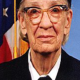

In [50]:
randomresizedcrop_rectangle = pt_RandomresizedCrop_transform_rectangle(grace_hopper_image)
randomresizedcrop_rectangle

`class` ***torchvision.transforms.RandomSizedCrop(*args, **kwargs)***

    Note: This transform is deprecated in favor of RandomResizedCrop.

`class` ***torchvision.transforms.FiveCrop(size)***

    Crop the given PIL Image into four corners and the central crop.abs

    Note: this transform returns a tuple of images and there may be a mismatch in the number of inputs and targets your Dataset returns.

***Parameters:***
    
    size (sequence or int) – Desired output size of the crop. If size is an int instead of sequence like (h, w), a square crop (size, size) is made.

In [61]:
five_crop= transforms.FiveCrop((180,120))
five_crop

FiveCrop(size=(180, 120))

In [62]:
fivecrop = five_crop(grace_hopper_image)

In [63]:
for i in range(len(fivecrop)):
    
    fivecrop[i].show()

`class` ***torchvision.transforms.TenCrop(size, vertical_flip=False)***

    Crop the given PIL Image into four corners and the central crop plus the flipped version of these (horizontal flipping is used by default)

    Note: this transform returns a tuple of images and there may be a mismatch in the number of inputs and targets your Dataset returns.

***Parameters:***
    
    size (sequence or int) – Desired output size of the crop. If size is an int instead of sequence like (h, w), a square crop (size, size) is made.

    vertical_flip (bool) – Use vertical flipping instead of horizontal

In [65]:
ten_crop= transforms.TenCrop((180,120),vertical_flip=False)
ten_crop

TenCrop(size=(180, 120), vertical_flip=False)

In [68]:
import time

In [71]:
tencrop = ten_crop(grace_hopper_image)

for i in range(len(tencrop)):
    
    tencrop[i].show()
    time.sleep(2)

`class` ***torchvision.transforms.Pad(padding, fill=0)***

    Pad the given PIL Image on all sides with the given “pad” value.

***Parameters:***
    
    padding (int or tuple) – Padding on each border. If a single int is provided this is used to pad all borders. If tuple of length 2 is provided this is the padding on left/right and top/bottom respectively. If a tuple of length 4 is provided this is the padding for the left, top, right and bottom borders respectively.

    fill – Pixel fill value. Default is 0. If a tuple of length 3, it is used to fill R, G, B channels respectively.

In [76]:
import numpy as np
import random

In [78]:
padding = random.randint(1, 20)
padding

3

In [86]:
pad = transforms.Pad(padding=(2,2),fill = (1,2,3))

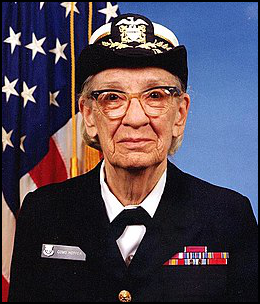

In [91]:
padd = pad(grace_hopper_image)
padd

`class` ***torchvision.transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)***

    Randomly change the brightness, contrast and saturation of an image.

***Parameters:***

    brightness (float) – How much to jitter brightness. brightness_factor is chosen uniformly from [max(0, 1 - brightness), 1 + brightness].

    contrast (float) – How much to jitter contrast. contrast_factor is chosen uniformly from [max(0, 1 - contrast), 1 + contrast].

    saturation (float) – How much to jitter saturation. saturation_factor is chosen uniformly from [max(0, 1 - saturation), 1 + saturation].

    hue (float) – How much to jitter hue. hue_factor is chosen uniformly from [-hue, hue]. Should be >=0 and <= 0.5.

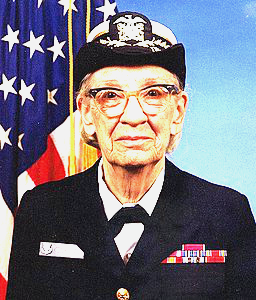

In [93]:
transforms.ColorJitter(brightness=0.8,saturation=0.1,contrast=0.1,hue=0.02)(grace_hopper_image)

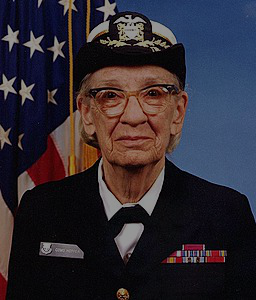

In [94]:
transforms.ColorJitter(brightness=2,saturation=0.1,contrast=0.1,hue=0.02)(grace_hopper_image)

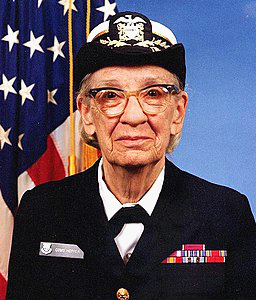

In [101]:
transforms.ColorJitter(brightness=0.22,saturation=0.02,contrast=0.1,hue=0.02)(grace_hopper_image)

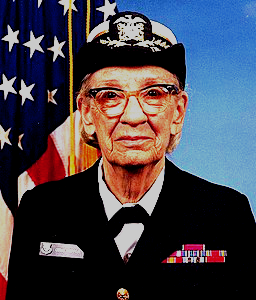

In [102]:
transforms.ColorJitter(brightness=0.22,saturation=0.02,contrast=1,hue=0.02)(grace_hopper_image)

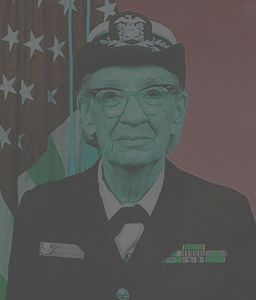

In [104]:
transforms.ColorJitter(brightness=0.22,saturation=0.02,contrast=1,hue=0.45)(grace_hopper_image)

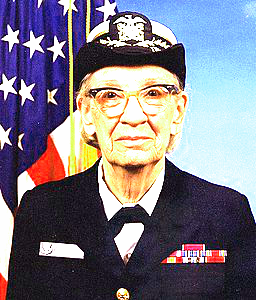

In [107]:
transforms.ColorJitter(brightness=2,saturation=0.02,contrast=0.1,hue=0.15)(grace_hopper_image)

<h1>Transforms on torch.*Tensor

`class` ***torchvision.transforms.Normalize(mean, std)***

    Normalize an tensor image with mean and standard deviation.

    Given mean: (R, G, B) and std: (R, G, B), will normalize each channel of the torch.*Tensor, i.e. channel = (channel - mean) / std

***Parameters:***
    
    mean (sequence) – Sequence of means for R, G, B channels respecitvely.
    
    std (sequence) – Sequence of standard deviations for R, G, B channels respecitvely.

__call__(tensor)

***Parameters:***
    
    tensor (Tensor) – Tensor image of size (C, H, W) to be normalized.

    Returns: Normalized image.

        
Return type: Tensor

In [112]:
img = transforms.ToTensor()(grace_hopper_image)
transforms.Normalize((0.5, 0.5,0.5), (0.5, 0.5,0.5))(img)

tensor([[[-0.8510, -0.7725, -0.7333,  ..., -0.4745, -0.4980, -0.4275],
         [-0.7882, -0.7961, -0.8039,  ..., -0.3725, -0.3176, -0.3647],
         [-0.7961, -0.7804, -0.7647,  ..., -0.3490, -0.3490, -0.3961],
         ...,
         [ 0.2078,  0.2235,  0.2000,  ..., -0.8980, -0.8902, -0.8980],
         [ 0.2078,  0.2157,  0.1922,  ..., -0.8902, -0.8824, -0.8902],
         [ 0.1843,  0.1922,  0.1922,  ..., -0.9059, -0.8980, -0.8980]],

        [[-0.8039, -0.7333, -0.7255,  ..., -0.1922, -0.2157, -0.1686],
         [-0.7412, -0.7569, -0.7961,  ..., -0.0902, -0.0588, -0.1059],
         [-0.7569, -0.7412, -0.7569,  ..., -0.0902, -0.0902, -0.1373],
         ...,
         [-0.9059, -0.8275, -0.8588,  ..., -0.9059, -0.8980, -0.9059],
         [-0.8980, -0.8353, -0.8667,  ..., -0.8980, -0.8902, -0.8980],
         [-0.8980, -0.8588, -0.8745,  ..., -0.9137, -0.9059, -0.9059]],

        [[-0.3961, -0.2784, -0.2000,  ...,  0.4196,  0.3961,  0.4510],
         [-0.3333, -0.3020, -0.2706,  ...,  0

<H1>Conversion Transforms

`class` ***torchvision.transforms.ToTensor***

    Convert a PIL Image or numpy.ndarray to tensor.

    Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].

`__call__(pic)`

***Parameters:***
    
    pic (PIL Image or numpy.ndarray) – Image to be converted to tensor.

***Returns:***
    
    Converted image.
Return type:	Tensor

In [114]:
img = transforms.ToTensor()(grace_hopper_image)
img

tensor([[[0.0745, 0.1137, 0.1333,  ..., 0.2627, 0.2510, 0.2863],
         [0.1059, 0.1020, 0.0980,  ..., 0.3137, 0.3412, 0.3176],
         [0.1020, 0.1098, 0.1176,  ..., 0.3255, 0.3255, 0.3020],
         ...,
         [0.6039, 0.6118, 0.6000,  ..., 0.0510, 0.0549, 0.0510],
         [0.6039, 0.6078, 0.5961,  ..., 0.0549, 0.0588, 0.0549],
         [0.5922, 0.5961, 0.5961,  ..., 0.0471, 0.0510, 0.0510]],

        [[0.0980, 0.1333, 0.1373,  ..., 0.4039, 0.3922, 0.4157],
         [0.1294, 0.1216, 0.1020,  ..., 0.4549, 0.4706, 0.4471],
         [0.1216, 0.1294, 0.1216,  ..., 0.4549, 0.4549, 0.4314],
         ...,
         [0.0471, 0.0863, 0.0706,  ..., 0.0471, 0.0510, 0.0471],
         [0.0510, 0.0824, 0.0667,  ..., 0.0510, 0.0549, 0.0510],
         [0.0510, 0.0706, 0.0627,  ..., 0.0431, 0.0471, 0.0471]],

        [[0.3020, 0.3608, 0.4000,  ..., 0.7098, 0.6980, 0.7255],
         [0.3333, 0.3490, 0.3647,  ..., 0.7529, 0.7804, 0.7569],
         [0.3373, 0.3569, 0.3843,  ..., 0.7569, 0.7569, 0.

`class` ***torchvision.transforms.ToPILImage***

    Convert a tensor or an ndarray to PIL Image.

    Converts a torch.*Tensor of shape C x H x W or a numpy ndarray of shape H x W x C to a PIL Image while preserving the value range.

__call__(pic)

***Parameters:***
    
    pic (Tensor or numpy.ndarray) – Image to be converted to PIL Image.
    
***Returns:***
    
    Image converted to PIL Image.

Return type:	PIL Image

In [118]:
PIL_img = transforms.ToPILImage(img)
PIL_img

ToPILImage(mode=tensor([[[0.0745, 0.1137, 0.1333,  ..., 0.2627, 0.2510, 0.2863],
         [0.1059, 0.1020, 0.0980,  ..., 0.3137, 0.3412, 0.3176],
         [0.1020, 0.1098, 0.1176,  ..., 0.3255, 0.3255, 0.3020],
         ...,
         [0.6039, 0.6118, 0.6000,  ..., 0.0510, 0.0549, 0.0510],
         [0.6039, 0.6078, 0.5961,  ..., 0.0549, 0.0588, 0.0549],
         [0.5922, 0.5961, 0.5961,  ..., 0.0471, 0.0510, 0.0510]],

        [[0.0980, 0.1333, 0.1373,  ..., 0.4039, 0.3922, 0.4157],
         [0.1294, 0.1216, 0.1020,  ..., 0.4549, 0.4706, 0.4471],
         [0.1216, 0.1294, 0.1216,  ..., 0.4549, 0.4549, 0.4314],
         ...,
         [0.0471, 0.0863, 0.0706,  ..., 0.0471, 0.0510, 0.0471],
         [0.0510, 0.0824, 0.0667,  ..., 0.0510, 0.0549, 0.0510],
         [0.0510, 0.0706, 0.0627,  ..., 0.0431, 0.0471, 0.0471]],

        [[0.3020, 0.3608, 0.4000,  ..., 0.7098, 0.6980, 0.7255],
         [0.3333, 0.3490, 0.3647,  ..., 0.7529, 0.7804, 0.7569],
         [0.3373, 0.3569, 0.3843,  ..., 0.

<h1>Generic Transforms

`class` ***torchvision.transforms.Lambda(lambd)***

    Apply a user-defined lambda as a transform.

***Parameters:***

    lambd (function) – Lambda/function to be used for transform.

In [122]:
import cv2

http://opencvpython.blogspot.com/2012/06/smoothing-techniques-in-opencv.html